Fungus areas: [0, 0, 0, 2641, 12093, 23012, 29557, 64612, 64612, 82270, 83699, 96101, 98946, 98946, 99225, 105092]


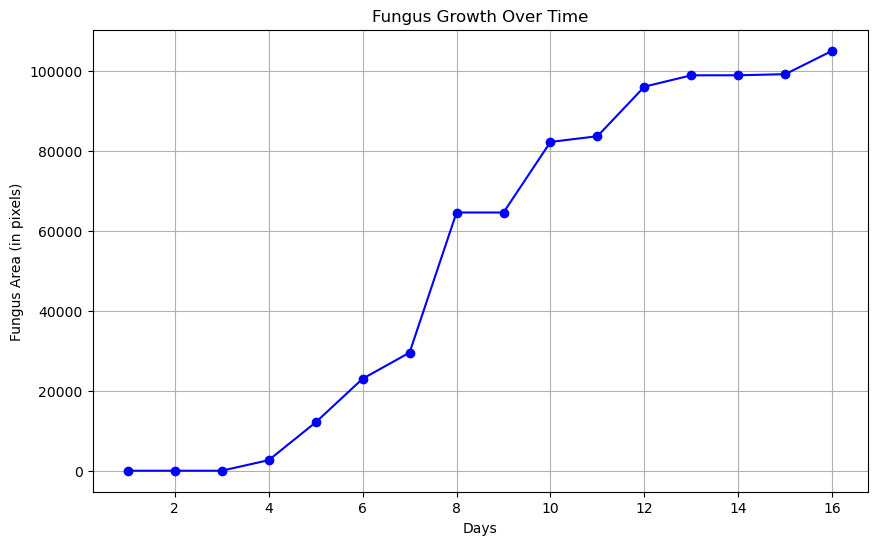

In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize a list to store fungus areas
fungus_areas = []
def process_image(filename):
    # Read the image in grayscale
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Error loading image {filename}")
        return None

   #Normalization
    image = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    
    # crop image
    x, y, w, h = 150, 130, 450, 450
    cropped_image = image[y:y+h, x:x+w]

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(cropped_image, (5, 5), 0)

    # Apply global thresholding
    ret, thresh1 = cv2.threshold(blurred, 175, 255, cv2.THRESH_BINARY_INV)
   

    # Apply opening to remove small holes
    kernel = np.ones((5, 5), np.uint8)
    opened_image = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)

    #cv2.imwrite(filename,opened_image)

    # Calculate pixel count of fungus
    fungus_area = cv2.countNonZero(opened_image)

    return fungus_area

# List of image filenames
filenames = [f"{i}.jpg" for i in range(1, 17)]


# Process each image and calculate the area of fungus
for filename in filenames:
    area = process_image(filename)
    fungus_areas.append(area)

# Print the calculated areas
print("Fungus areas:", fungus_areas)

# Plot the growth of fungus over time
days = list(range(1, 17))

plt.figure(figsize=(10, 6))
plt.plot(days, fungus_areas, marker='o', linestyle='-', color='b')
plt.title('Fungus Growth Over Time')
plt.xlabel('Days')
plt.ylabel('Fungus Area (in pixels)')
plt.grid(True)
plt.show()